In [6]:
import warnings
warnings.filterwarnings('ignore')

# ЗАДАЧА 1

Используя данные о продажах (набор данных "tips" из Seaborn), найдите средний размер чаевых (tip) для каждого дня недели, а затем постройте столбчатую диаграмму для визуализации результатов.

Первые 5 строк исходных данных:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Средний размер чаевых для каждой группы (месяц и день):
    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


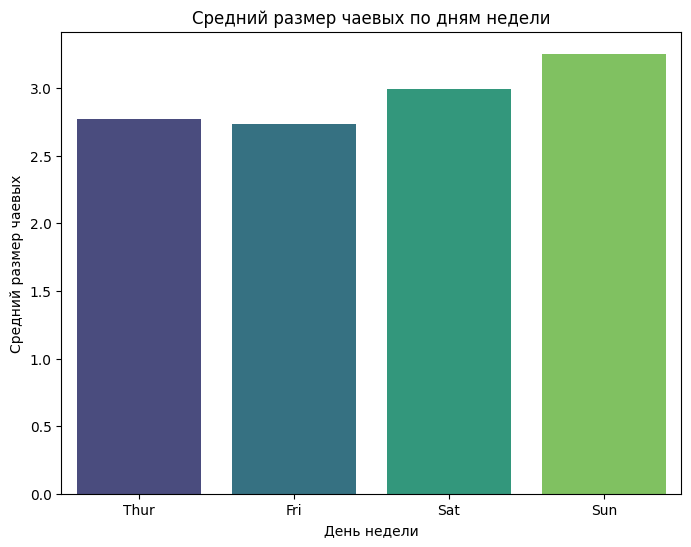

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
# Здесь мы загружаем набор данных 'tips' из библиотеки Seaborn. Данные содержат информацию о счетах, чаевых и характеристиках посетителей ресторана.
df = sns.load_dataset('tips')
print("Первые 5 строк исходных данных:")
print(df.head())

# 2. Группировка данных и вычисление среднего размера чаевых
# В исходном примере была попытка группировки по 'month' и 'day', однако для вычисления среднего чаевых необходимо использовать столбец 'tip'
# Метод agg позволяет агрегировать данные: здесь мы вычисляем среднее значение 'tip' для каждой группы.
mean_tip_by_day = df.groupby(['day']).agg({'tip': 'mean'}).reset_index()
print("\nСредний размер чаевых для каждой группы (месяц и день):")
print(mean_tip_by_day)

# 3. Построение столбчатой диаграммы
# Используем Matplotlib для создания фигуры и Seaborn для построения диаграммы.
# По оси X отображаем день недели, по оси Y – средние значения чаевых.
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=mean_tip_by_day, palette='viridis')
plt.title('Средний размер чаевых по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний размер чаевых')
plt.show()

# ЗАДАЧА 2

Используя набор данных "tips" из Seaborn, постройте совместные гистограммы для визуализации распределения общего счета (total_bill) и размера чаевых (tip) с разделением по полу клиентов (sex).

Первые 5 строк набора данных:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Статистическая сводка числовых признаков:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Распределение клиентов по полу:
sex
Male      157
Female     87
Name: count, dtype: int64


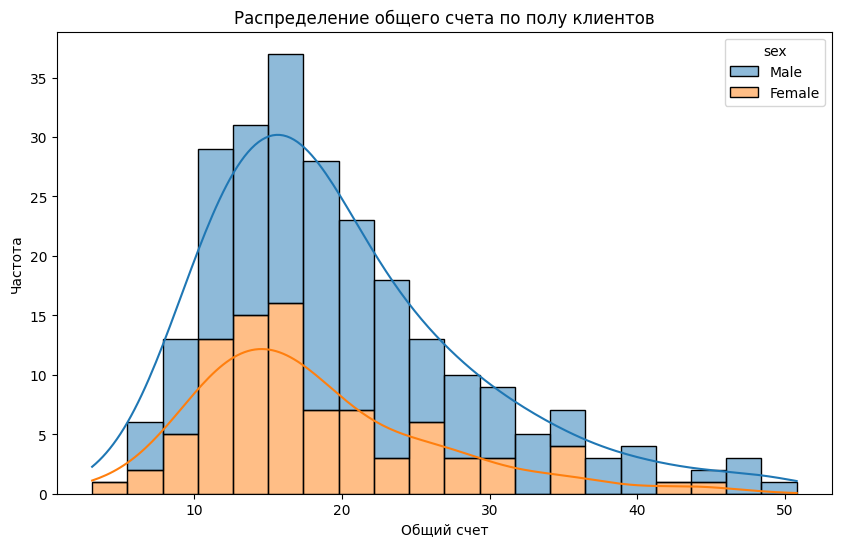


Статистика для 'total_bill':
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


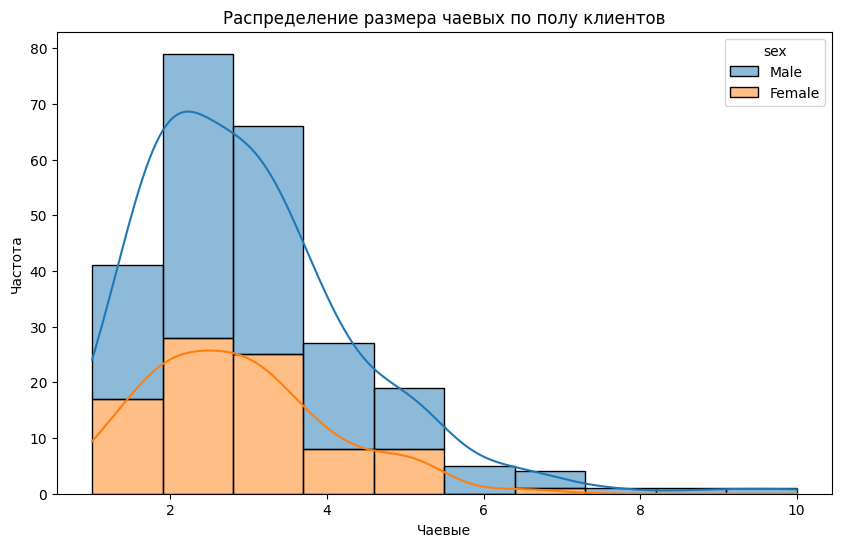


Статистика для 'tip':
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = sns.load_dataset('tips')

#первые 5 строк набора данных
print("Первые 5 строк набора данных:")
print(df.head())

#общее описание данных (статистическая сводка)
print("\nСтатистическая сводка числовых признаков:")
print(df.describe())

#распределение клиентов по полу
print("\nРаспределение клиентов по полу:")
print(df['sex'].value_counts())

#Построение гистограммы для общего счета с разделением по полу
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_bill', hue='sex', multiple='stack', bins=20, kde=True)
plt.title('Распределение общего счета по полу клиентов')
plt.xlabel('Общий счет')
plt.ylabel('Частота')
plt.show()

#описание столбца 'total_bill'
print("\nСтатистика для 'total_bill':")
print(df['total_bill'].describe())

#Построение гистограммы для размера чаевых с разделением по полу
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tip', hue='sex', multiple='stack', bins=10, kde=True)
plt.title('Распределение размера чаевых по полу клиентов')
plt.xlabel('Чаевые')
plt.ylabel('Частота')
plt.show()

# Промежуточный вывод: описание столбца 'tip'
print("\nСтатистика для 'tip':")
print(df['tip'].describe())

# ЗАДАЧА 3

Используя данные о продажах (например, набор данных "sales_data" из первого вопроса), найдите месяц с наибольшим общим объемом продаж, а затем для этого месяца определите предмет с самой высокой средней оценкой.

In [9]:
import numpy as np
import pandas as pd

# Данные о продажах
sales_data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Math': [85, 78, 92, 70, 88, 90, 82, 76, 85, 89, 88, 92],
    'Physics': [90, 82, 76, 85, 89, 88, 92, 80, 87, 90, 85, 79],
    'Informatics': [88, 92, 80, 87, 90, 85, 89, 88, 92, 70, 88, 82]
}

# Преобразование в DataFrame
df = pd.DataFrame(sales_data)
print("Исходный DataFrame:")
print(df)

# Вычисление общего объема продаж по всем предметам (сумма оценок)
df['TotalSales'] = df['Math'] + df['Physics'] + df['Informatics']
print("\nDataFrame после добавления столбца 'TotalSales':")
print(df)

# Найти месяц с наибольшим общим объемом продаж
max_sales_month = df.loc[df['TotalSales'].idxmax(), 'Month']
print(f"\nМесяц с наибольшим общим объемом продаж: {max_sales_month}")

# Для выбранного месяца получить данные по предметам
selected_row = df.loc[df['Month'] == max_sales_month, ['Math', 'Physics', 'Informatics']]
print(f"\nДанные по предметам для месяца {max_sales_month}:")
print(selected_row)

# Поскольку для выбранного месяца строка всего одна, среднее значение для каждого предмета равно его значению.
# Находим предмет с наибольшим значением
subject_with_highest_mean = selected_row.mean().idxmax()
print(f"\nПредмет с самой высокой средней оценкой в месяце {max_sales_month}: {subject_with_highest_mean}")

Исходный DataFrame:
        Month  Math  Physics  Informatics
0     January    85       90           88
1    February    78       82           92
2       March    92       76           80
3       April    70       85           87
4         May    88       89           90
5        June    90       88           85
6        July    82       92           89
7      August    76       80           88
8   September    85       87           92
9     October    89       90           70
10   November    88       85           88
11   December    92       79           82

DataFrame после добавления столбца 'TotalSales':
        Month  Math  Physics  Informatics  TotalSales
0     January    85       90           88         263
1    February    78       82           92         252
2       March    92       76           80         248
3       April    70       85           87         242
4         May    88       89           90         267
5        June    90       88           85         263
6     

# ЗАДАЧА 4

Даны данные о продажах различных товаров в нескольких регионах за квартал. Необходимо выполнить следующие шаги:

Создать массив NumPy для представления данных о продажах.

Выполнить индексацию и выборку данных для анализа.

Вычислить средние продажи по регионам и по товарам.

Найти наиболее и наименее продаваемые товары по суммарным продажам.

In [10]:
import numpy as np

# Данные о продажах по регионам и товарам (представлены в виде двумерного массива)
sales_data = np.array([
    [120, 150, 180, 200],   # Продажи товара A в различных регионах
    [90, 100, 110, 120],    # Продажи товара B в различных регионах
    [80, 70, 60, 50],       # Продажи товара C в различных регионах
    [200, 180, 220, 240]    # Продажи товара D в различных регионах
])

# Вывод исходного массива для первичной проверки данных
print("Исходный массив данных о продажах:")
print(sales_data)

# Определяем названия регионов и товаров
region_names = ['North', 'South', 'East', 'West']
product_names = ['A', 'B', 'C', 'D']

# Вывод данных о продажах для каждого товара и региона
print("\nДанные о продажах по товарам и регионам:")
for i, product in enumerate(product_names):
    for j, region in enumerate(region_names):
        print(f"Продажи товара {product} в регионе {region}: {sales_data[i, j]}")

# Вычисление средних продаж по регионам (среднее значение по каждому столбцу)
mean_sales_per_region = np.mean(sales_data, axis=0)
print("\nПромежуточный результат: средние продажи по регионам (вычислено по столбцам):")
print(mean_sales_per_region)

# Вычисление средних продаж по товарам (среднее значение по каждой строке)
mean_sales_per_product = np.mean(sales_data, axis=1)
print("\nПромежуточный результат: средние продажи по товарам (вычислено по строкам):")
print(mean_sales_per_product)

# Вывод средних продаж по регионам
print("\nСредние продажи по регионам:")
for i, region in enumerate(region_names):
    print(f"Средние продажи в регионе {region}: {mean_sales_per_region[i]}")

# Вывод средних продаж по товарам
print("\nСредние продажи по товарам:")
for i, product in enumerate(product_names):
    print(f"Средние продажи товара {product}: {mean_sales_per_product[i]}")

# Нахождение суммарных продаж по каждому товару
total_sales_per_product = np.sum(sales_data, axis=1)
print("\nПромежуточный результат: суммарные продажи по каждому товару:")
print(total_sales_per_product)

# Определение наиболее и наименее продаваемых товаров по суммарным продажам
most_sold_product = product_names[np.argmax(total_sales_per_product)]
least_sold_product = product_names[np.argmin(total_sales_per_product)]

print(f"\nНаиболее продаваемый товар: {most_sold_product}")
print(f"Наименее продаваемый товар: {least_sold_product}")

Исходный массив данных о продажах:
[[120 150 180 200]
 [ 90 100 110 120]
 [ 80  70  60  50]
 [200 180 220 240]]

Данные о продажах по товарам и регионам:
Продажи товара A в регионе North: 120
Продажи товара A в регионе South: 150
Продажи товара A в регионе East: 180
Продажи товара A в регионе West: 200
Продажи товара B в регионе North: 90
Продажи товара B в регионе South: 100
Продажи товара B в регионе East: 110
Продажи товара B в регионе West: 120
Продажи товара C в регионе North: 80
Продажи товара C в регионе South: 70
Продажи товара C в регионе East: 60
Продажи товара C в регионе West: 50
Продажи товара D в регионе North: 200
Продажи товара D в регионе South: 180
Продажи товара D в регионе East: 220
Продажи товара D в регионе West: 240

Промежуточный результат: средние продажи по регионам (вычислено по столбцам):
[122.5 125.  142.5 152.5]

Промежуточный результат: средние продажи по товарам (вычислено по строкам):
[162.5 105.   65.  210. ]

Средние продажи по регионам:
Средние прода

# ЗАДАЧА 5

Используя данные о продажах из набора данных "sales_data" (как в предыдущей задаче), постройте совместную таблицу (pivot table) средних оценок по предметам (Math, Physics, Informatics) для каждого месяца. Затем визуализируйте результаты с помощью тепловой карты (heatmap) из библиотеки Seaborn.

Исходный DataFrame:
        Month  Math  Physics  Informatics
0     January    85       90           88
1    February    78       82           92
2       March    92       76           80
3       April    70       85           87
4         May    88       89           90
5        June    90       88           85
6        July    82       92           89
7      August    76       80           88
8   September    85       87           92
9     October    89       90           70
10   November    88       85           88
11   December    92       79           82

Сводная таблица (pivot_table):
           Informatics  Math  Physics
Month                                
April             87.0  70.0     85.0
August            88.0  76.0     80.0
December          82.0  92.0     79.0
February          92.0  78.0     82.0
January           88.0  85.0     90.0
July              89.0  82.0     92.0
June              85.0  90.0     88.0
March             80.0  92.0     76.0
May               90.0

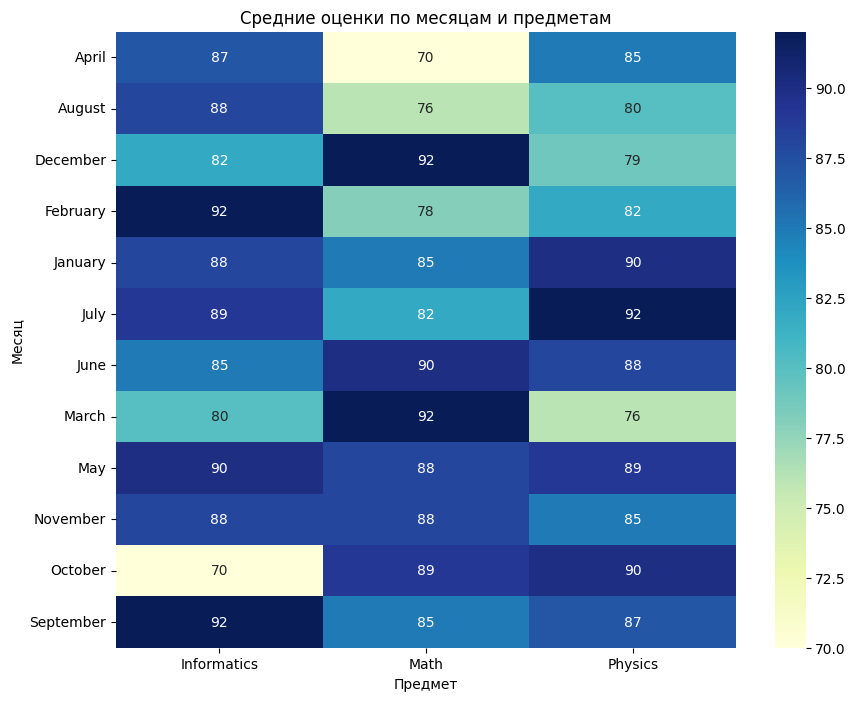

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Данные о продажах (здесь представлены средние оценки по предметам для каждого месяца)
sales_data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Math': [85, 78, 92, 70, 88, 90, 82, 76, 85, 89, 88, 92],
    'Physics': [90, 82, 76, 85, 89, 88, 92, 80, 87, 90, 85, 79],
    'Informatics': [88, 92, 80, 87, 90, 85, 89, 88, 92, 70, 88, 82]
}

# Преобразование данных в DataFrame
df = pd.DataFrame(sales_data)
print("Исходный DataFrame:")
print(df)  # Выводим DataFrame для проверки загруженных данных

# Создание сводной таблицы: вычисляем средние оценки по предметам для каждого месяца
pivot_table = df.pivot_table(index='Month', values=['Math', 'Physics', 'Informatics'], aggfunc='mean')
print("\nСводная таблица (pivot_table):")
print(pivot_table)  # Промежуточный вывод сводной таблицы для проверки результатов агрегации

# Построение тепловой карты на основе сводной таблицы
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Средние оценки по месяцам и предметам')
plt.xlabel('Предмет')
plt.ylabel('Месяц')
plt.show()